**<h2>1. Importing the libraries</h2>**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

> - **Importing Libraries**: The first crucial step in Exploratory Data Analysis (EDA), providing essential tools for data handling, visualization, and statistical analysis.
> - **Pandas**: A popular Python library used for efficient data manipulation and exploration, enabling easy loading and cleaning of datasets.
> - **Matplotlib and Seabor**n: Widely used libraries for creating informative visualizations that help reveal patterns, trends, and relationships within the data.
> - **NumPy**: An additional library that supports numerical operations, especially useful for working with large datasets.

**<h2>2. Loading the dataset</h2>**

In [2]:
#load the dataset
df = pd.read_csv('diabetes_dataset.csv')
df.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


> - This dataset appears to contain diverse health and demographic data potentially useful for predicting diabetes.
> - It includes patient information like Age, Gender, BMI, Blood Pressure, and Glucose Levels, along with lifestyle factors such as Physical Activity, Family History, Smoking Status, and Alcohol Consumption.
> - The target column, Diabetes Status, indicates whether each individual has diabetes.
> - This mix of medical and lifestyle attributes provides a rich foundation for exploring correlations, trends, and risk factors associated with diabetes, as well as for building predictive models aimed at early detection and intervention.

**<h2> 3. Data Cleaning </h2>**

**<h3> Handling missing values</h3>**

In [3]:
df.isna().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


> - The dataset contains 520 rows and 17 columns, with no missing values in any of the columns. This means that the data is complete, and no imputation or handling of missing values is necessary before analysis.

**<h3> Check for duplicates and remove duplicates from the dataset</h3>**

In [4]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Drop duplicates if any
df.drop_duplicates(inplace=True)



Number of duplicate rows: 269


> - The dataset contains **269** duplicate rows. These duplicates are removed to ensure data quality and avoid bias in analysis or modeling.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 251 non-null    int64 
 1   Gender              251 non-null    object
 2   Polyuria            251 non-null    object
 3   Polydipsia          251 non-null    object
 4   sudden weight loss  251 non-null    object
 5   weakness            251 non-null    object
 6   Polyphagia          251 non-null    object
 7   Genital thrush      251 non-null    object
 8   visual blurring     251 non-null    object
 9   Itching             251 non-null    object
 10  Irritability        251 non-null    object
 11  delayed healing     251 non-null    object
 12  partial paresis     251 non-null    object
 13  muscle stiffness    251 non-null    object
 14  Alopecia            251 non-null    object
 15  Obesity             251 non-null    object
 16  class               251 non-nul

**<h3> Distribution of Target Variable(Class) </h3>**

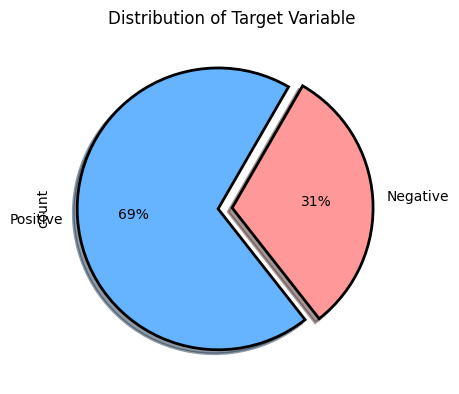

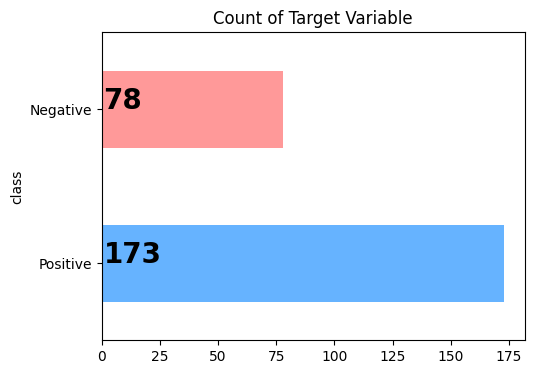

In [6]:
# plotting to create pie chart and bar plot as subplots
plt.figure(figsize=(10,5))
plt.subplot(121)
df["class"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette(['#66b3ff' , '#ff9999']),startangle = 60,labels=["Positive","Negative"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of Target Variable")

plt.figure(figsize=(12, 4))
plt.subplot(122)
custom_colors = ['#66b3ff' , '#ff9999']  # Replace with desired colors

# Plot the horizontal bar chart
ax = df["class"].value_counts().plot(kind="barh", color=custom_colors)

for i,j in enumerate(df["class"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of Target Variable")
plt.show()

> - The pie chart illustrates the distribution of the target variable (class), highlighting the proportion of "Positive" and "Negative" cases in the dataset. The chart shows that the two classes are well-balanced, with each comprising an almost equal percentage of the data.
> - The horizontal bar chart provides a count of the "Positive" and "Negative" cases, reinforcing the balance observed in the pie chart. This balance ensures fair representation of both classes for model training and evaluation.

**<h3> Target Variable Analysis </h3>**

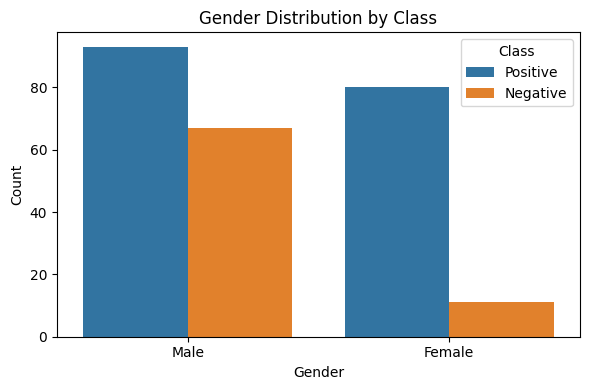

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Gender'],hue=df['class'], data=df)
plt.title("Gender Distribution by Class")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Class", loc='upper right')
plt.tight_layout()
plt.show()


> - The bar chart displays the distribution of gender (Male, Female) across the two classes: Positive and Negative for diabetes.
> - The dataset reveals a clear comparison, showing the proportion of males and females in each class, with potential insights into gender-specific patterns in diabetes cases.
> - This visualization helps in identifying whether gender is a significant factor in diabetes prevalence.

**<h3> Distribution of Numerical variable(Age) by Class</h3>**

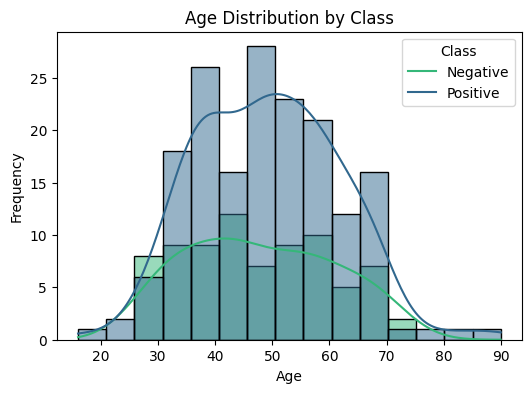

In [8]:
# Distribution plot for Age and Class

# Set up the figure
plt.figure(figsize=(6, 4))

# Distribution plot for Age colored by Class
sns.histplot(data=df, x='Age', hue='class', kde=True, bins=15, palette='viridis')

# Title and labels
plt.title('Age Distribution by Class')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Class', labels=['Negative', 'Positive'])

# Show plot
plt.show()


> - **Age Distribution Comparison**: The histogram compares age distributions across two classes, "Positive" and "Negative" (presumably for diabetes status)..
> - **Frequency and Age:** The plot uses 15 bins to display the frequency of each age group within each class, helping to identify age ranges that may be more common among each class.

**<h3> Distribution of Symptoms with Diabetes class</h3>**

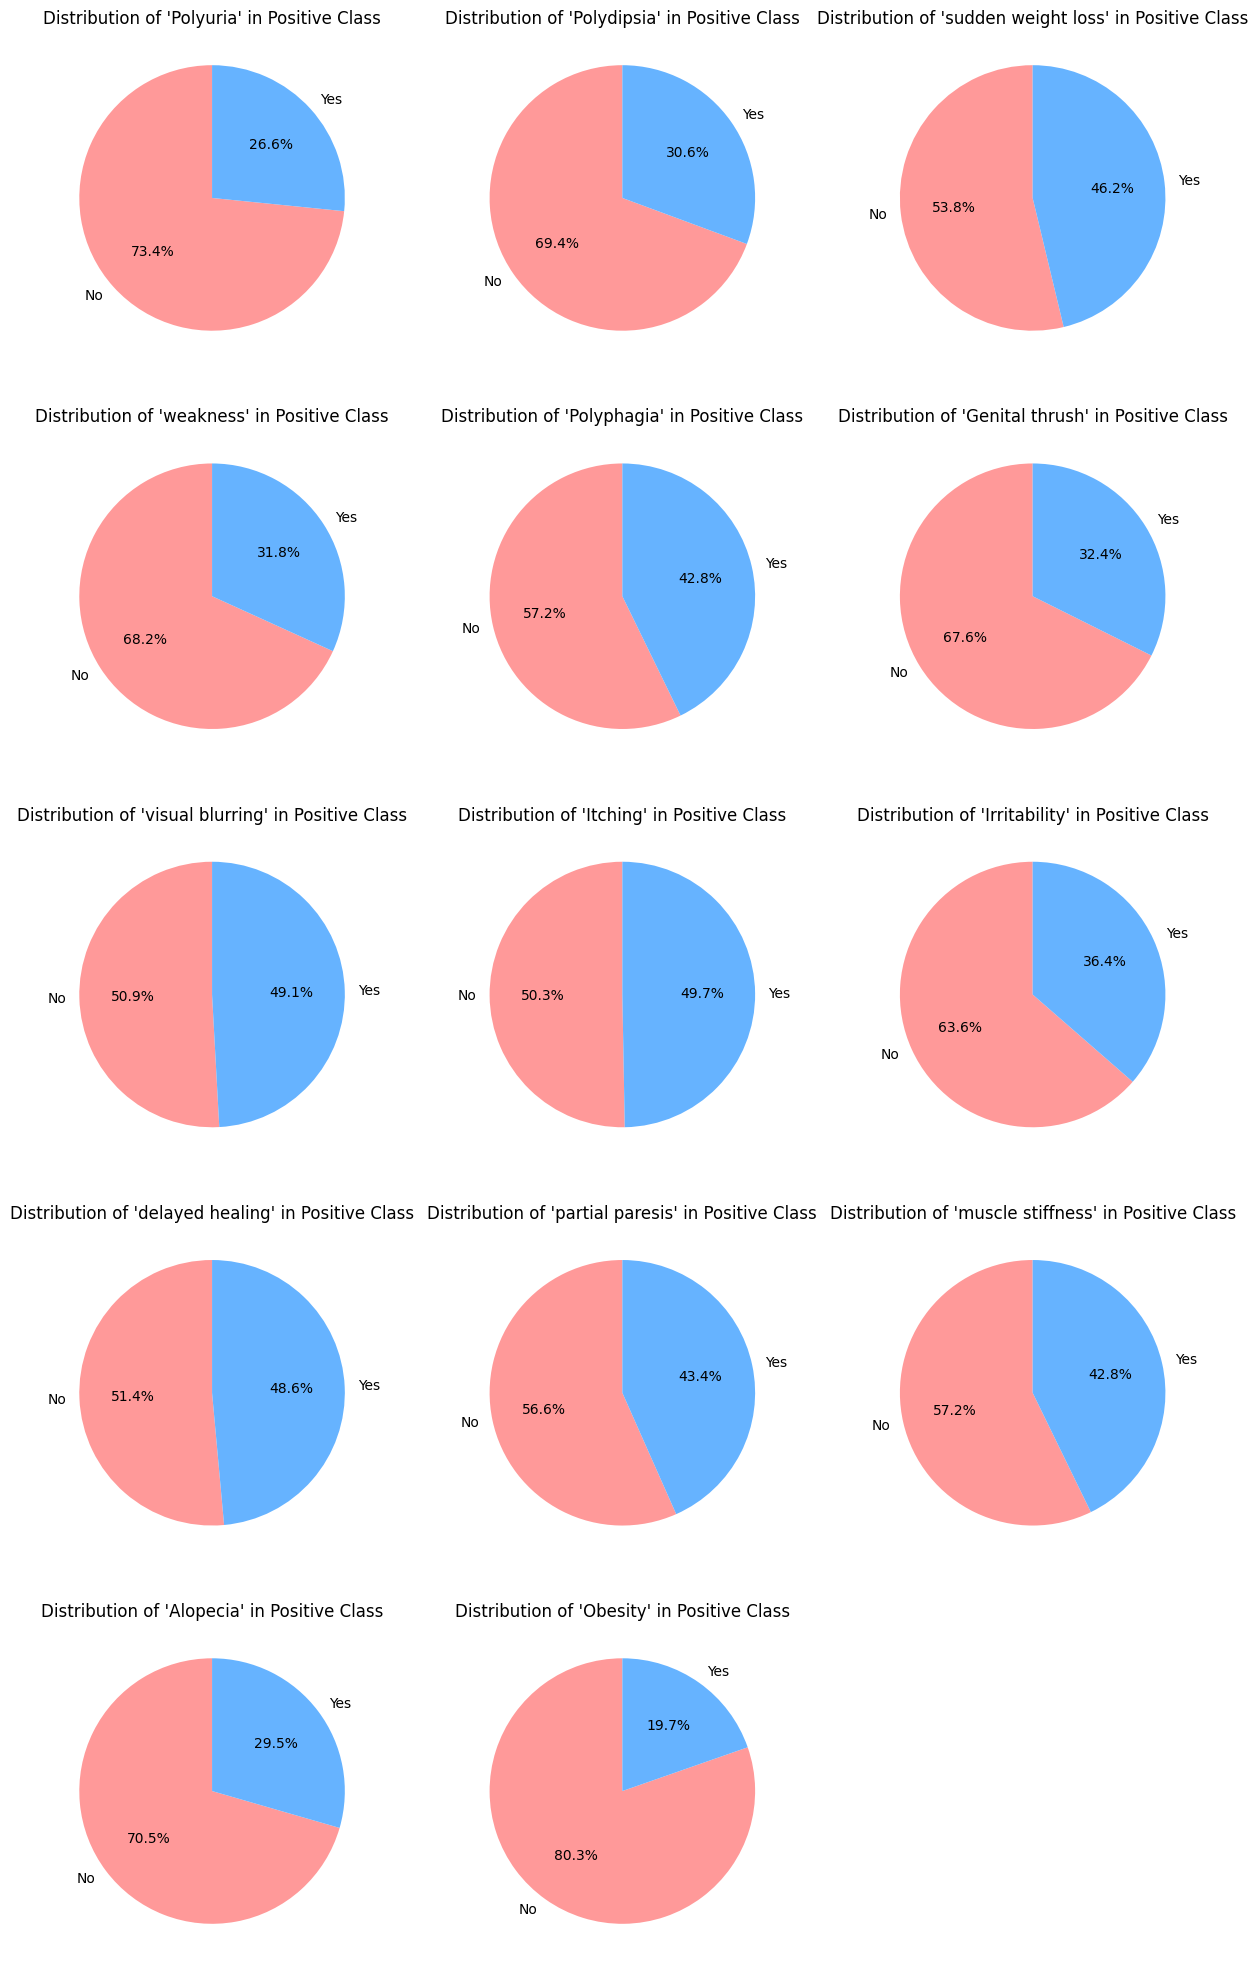

<Figure size 600x400 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt

# Convert 'Yes'/'No' values to binary 1/0 for simplicity
df_binary = df.replace({'Yes': 1, 'No': 0})

# Filter for the "Positive" class
df_positive = df_binary[df_binary['class'] == 'Positive']

# Drop non-binary and unnecessary columns (Age, Gender, and class)
binary_columns = df_positive.drop(columns=['Age', 'Gender', 'class'])

# Exclude the 15th column (if 0-indexed, column index 14)
columns_to_plot = binary_columns.columns[:14]

# Plot pie charts for each binary symptom column in 3 columns layout
num_columns = 3
num_rows = -(-len(columns_to_plot) // num_columns)  # Calculate required rows

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten for easy indexing

for idx, column in enumerate(columns_to_plot):
    # Count the occurrences of 0 and 1
    counts = df_positive[column].value_counts()

    # Plot pie chart
    axes[idx].pie(counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
    axes[idx].set_title(f"Distribution of '{column}' in Positive Class")

# Turn off unused subplots
for idx in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[idx])

plt.figure(figsize=(6, 4))
plt.tight_layout()
plt.show()


> - This series of pie charts shows the percentage distribution of each symptom (Yes/No) in the Positive class (diabetes diagnosed cases). This helps visually assess which symptoms are more prevalent among individuals with diabetes, offering insights into which symptoms are more commonly associated with positive diabetes diagnoses.

**<h3> Distribution of Age by Symptoms and Diabetes class </h3>**

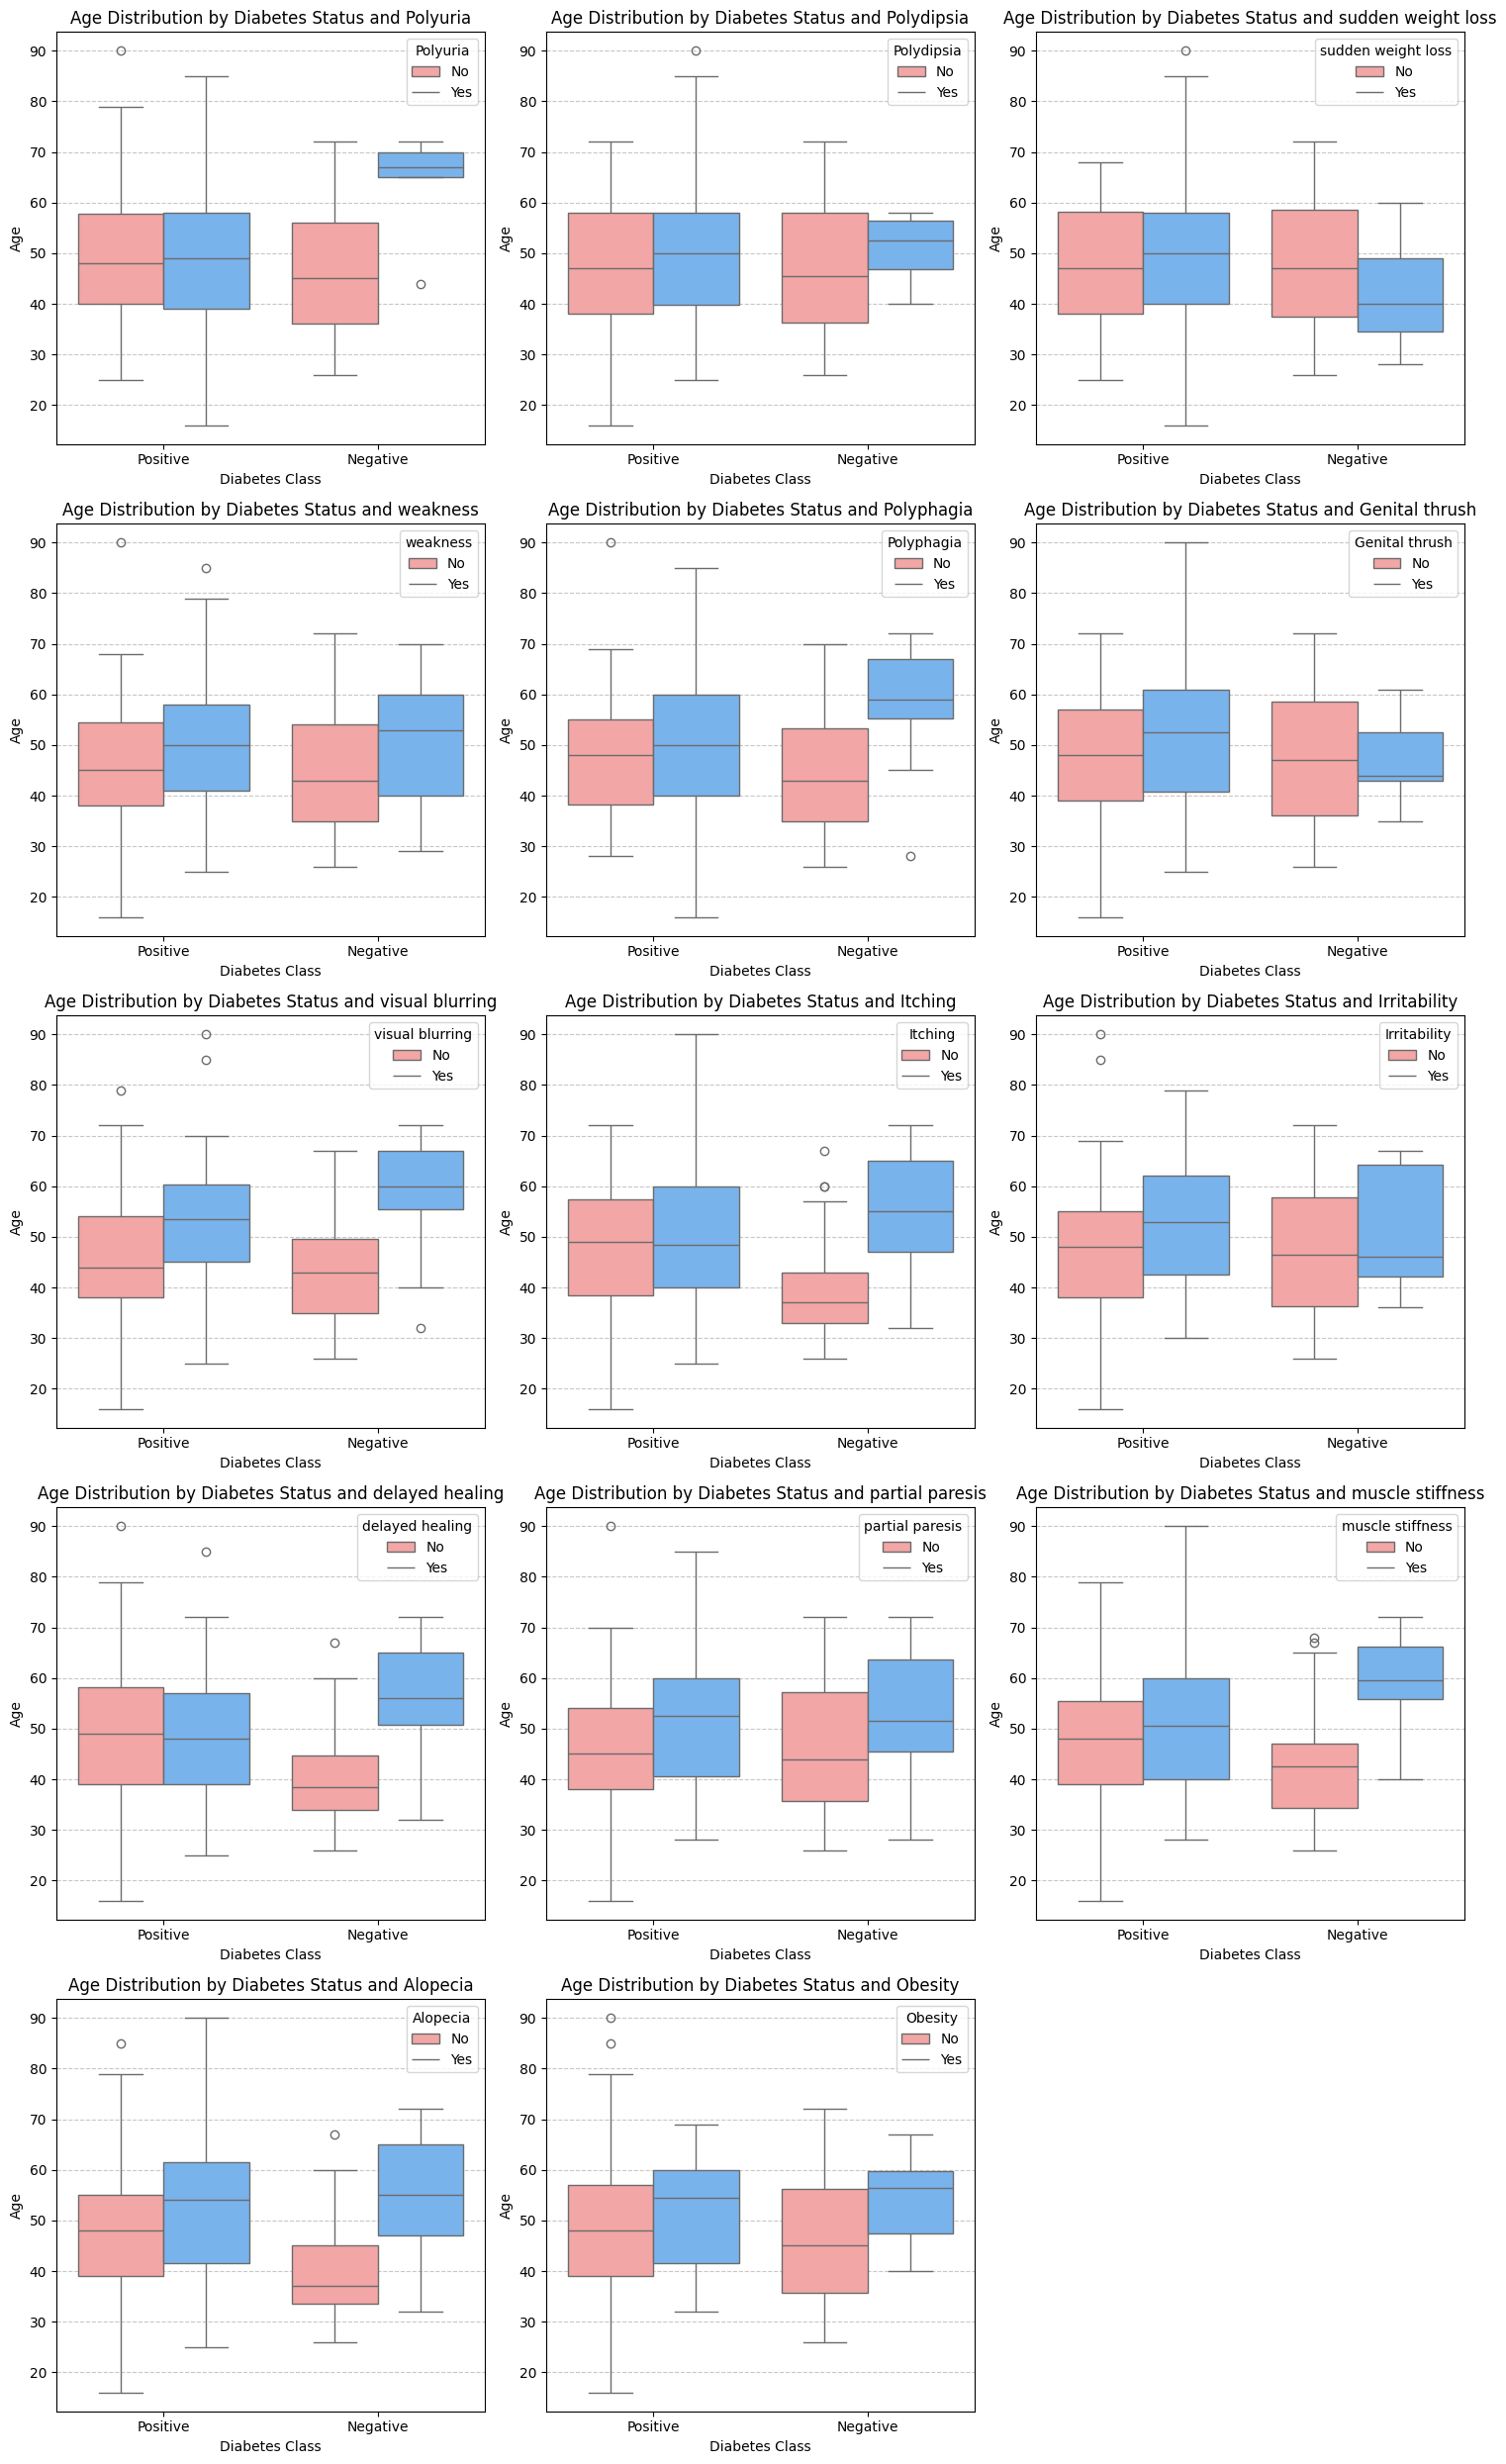

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Automatically detect symptom columns by excluding 'Age', 'Gender', and 'class'
symptom_columns = [col for col in df.columns if col not in ['Age', 'Gender', 'class']]

# Convert binary Yes/No columns to numeric for easier plotting (Yes=1, No=0)
df_binary = df.replace({'Yes': 1, 'No': 0})

# Calculate the number of rows and columns needed for the subplots
num_symptoms = len(symptom_columns)
num_cols = 3  # Number of columns for the subplot grid
num_rows = (num_symptoms + num_cols - 1) // num_cols  # Calculate the number of rows

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each symptom column to create box plots
for i, symptom in enumerate(symptom_columns):
    sns.boxplot(data=df_binary, x='class', y='Age', hue=symptom, palette=['#ff9999', '#66b3ff'], ax=axes[i])
    axes[i].set_title(f"Age Distribution by Diabetes Status and {symptom}")
    axes[i].set_xlabel("Diabetes Class")
    axes[i].set_ylabel("Age")
    axes[i].legend(title=symptom, labels=["No", "Yes"])
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hide any unused subplots
for j in range(num_symptoms, num_rows * num_cols):
    axes[j].set_visible(False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

> - The code generates a series of box plots to explore the relationship between Age, Diabetes Status (class), and various symptoms.
> - By automatically detecting the symptom columns, each plot displays the age distribution for Positive and Negative diabetes cases, with the data further separated by whether each symptom (e.g., Polyuria, Polydipsia) is present or absent. Converting Yes/No values to numeric (1/0) enables clear, categorical differentiation in the plots.
> - The use of color and a separate legend for each symptom makes it easy to compare age variations across symptoms, highlighting any age-related trends in symptom prevalence among diabetic and non-diabetic individuals.

**<h2> 4. Univariate Analysis </h2>**

**<h3> Distribution of Age </h3>**

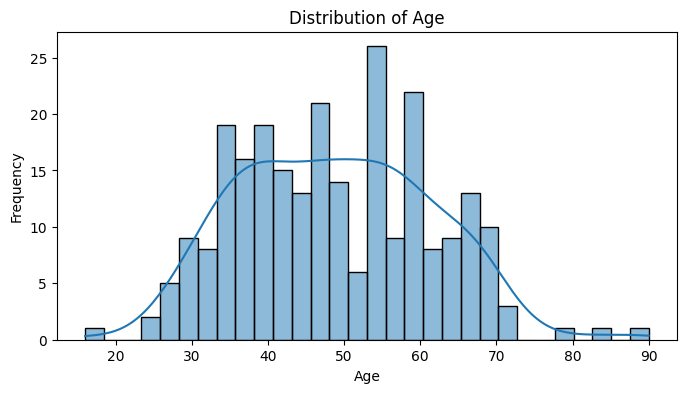

In [11]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title(f'Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


> - **Age Distribution Plot**: The histogram shows the distribution of ages in the dataset.
> - **Bins**: The data is divided into 30 bins, giving a detailed view of the age spread and highlighting any peaks or trends in age.

**<h3> Distribution of Gender </h3>**

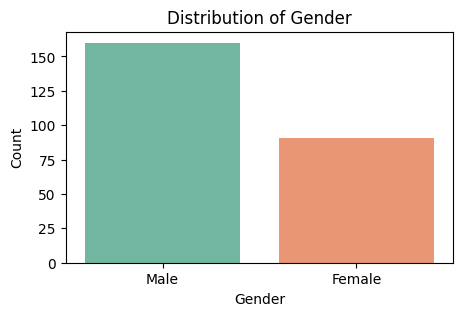

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of 'Gender' column
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


> - The distribution plot of the 'Gender' column shows the count of male and female entries in the dataset. The plot reveals whether there is a gender imbalance in the data, with the bar heights representing the number of individuals identified as either male or female.

In [13]:
import plotly.express as px

# Convert categorical columns to appropriate types for better plotting
df['Polyuria'] = df['Polyuria'].astype(str)
df['Polydipsia'] = df['Polydipsia'].astype(str)
df['class'] = df['class'].astype(str)
df['Gender'] = df['Gender'].astype(str)

# Create the plot with plotly
fig = px.box(
    df,
    x='class',
    y='Age',
    color='Gender',
    facet_row='Polyuria',
    facet_col='Polydipsia',
    points="all",
    color_discrete_map={"Male": "blue", "Female": "pink"},
    title='Age Distribution by Diabetes Status, Gender, and Additional Symptoms(Polydipsia and polyuria)'
)

# Update layout for better readability
fig.update_layout(
    yaxis_title="Age",
    xaxis_title="Class",
    legend_title="Gender"
)

fig.show()


> - The above box plot visualizes the age distribution by diabetes status (class), gender, and additional symptoms (Polyuria and Polydipsia).
> - Each box represents the age range for individuals in a particular category, divided by whether they have symptoms of polyuria (excessive urination) and polydipsia (excessive thirst). The data points are shown within each box to provide detailed insights into individual ages.
> - Gender is color-coded, with male data points in blue and female in pink. This visualization helps identify trends in age and gender across different symptom categories and diabetes status, revealing whether certain symptoms or age groups correlate with a positive or negative diabetes diagnosis.

**<h3> 5. Bivariate Analysis</h3>**

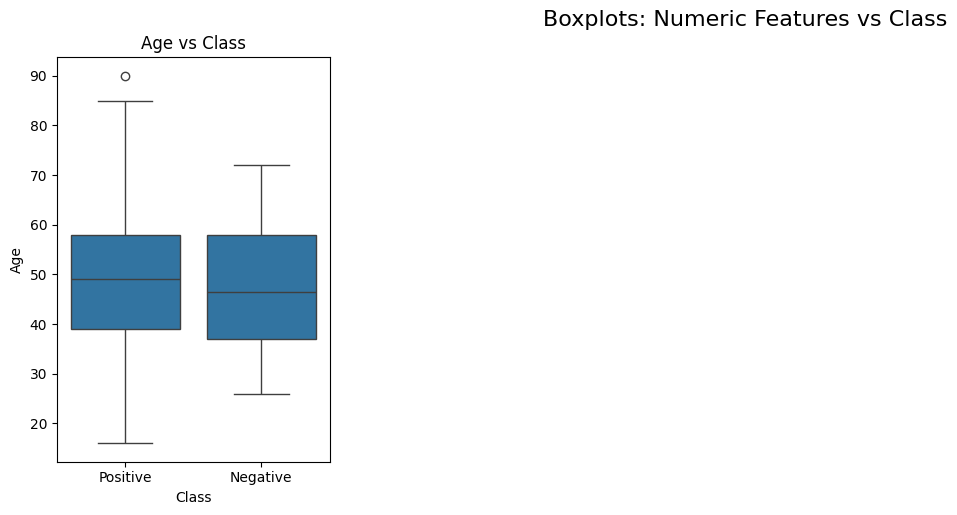

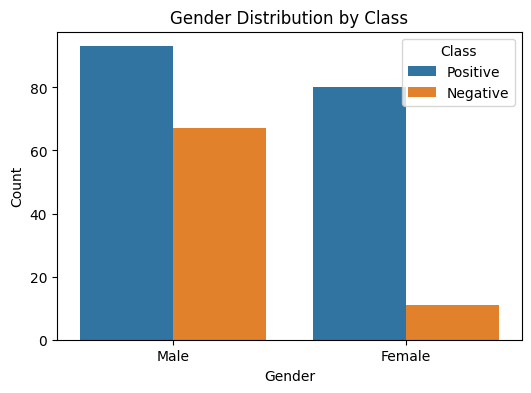

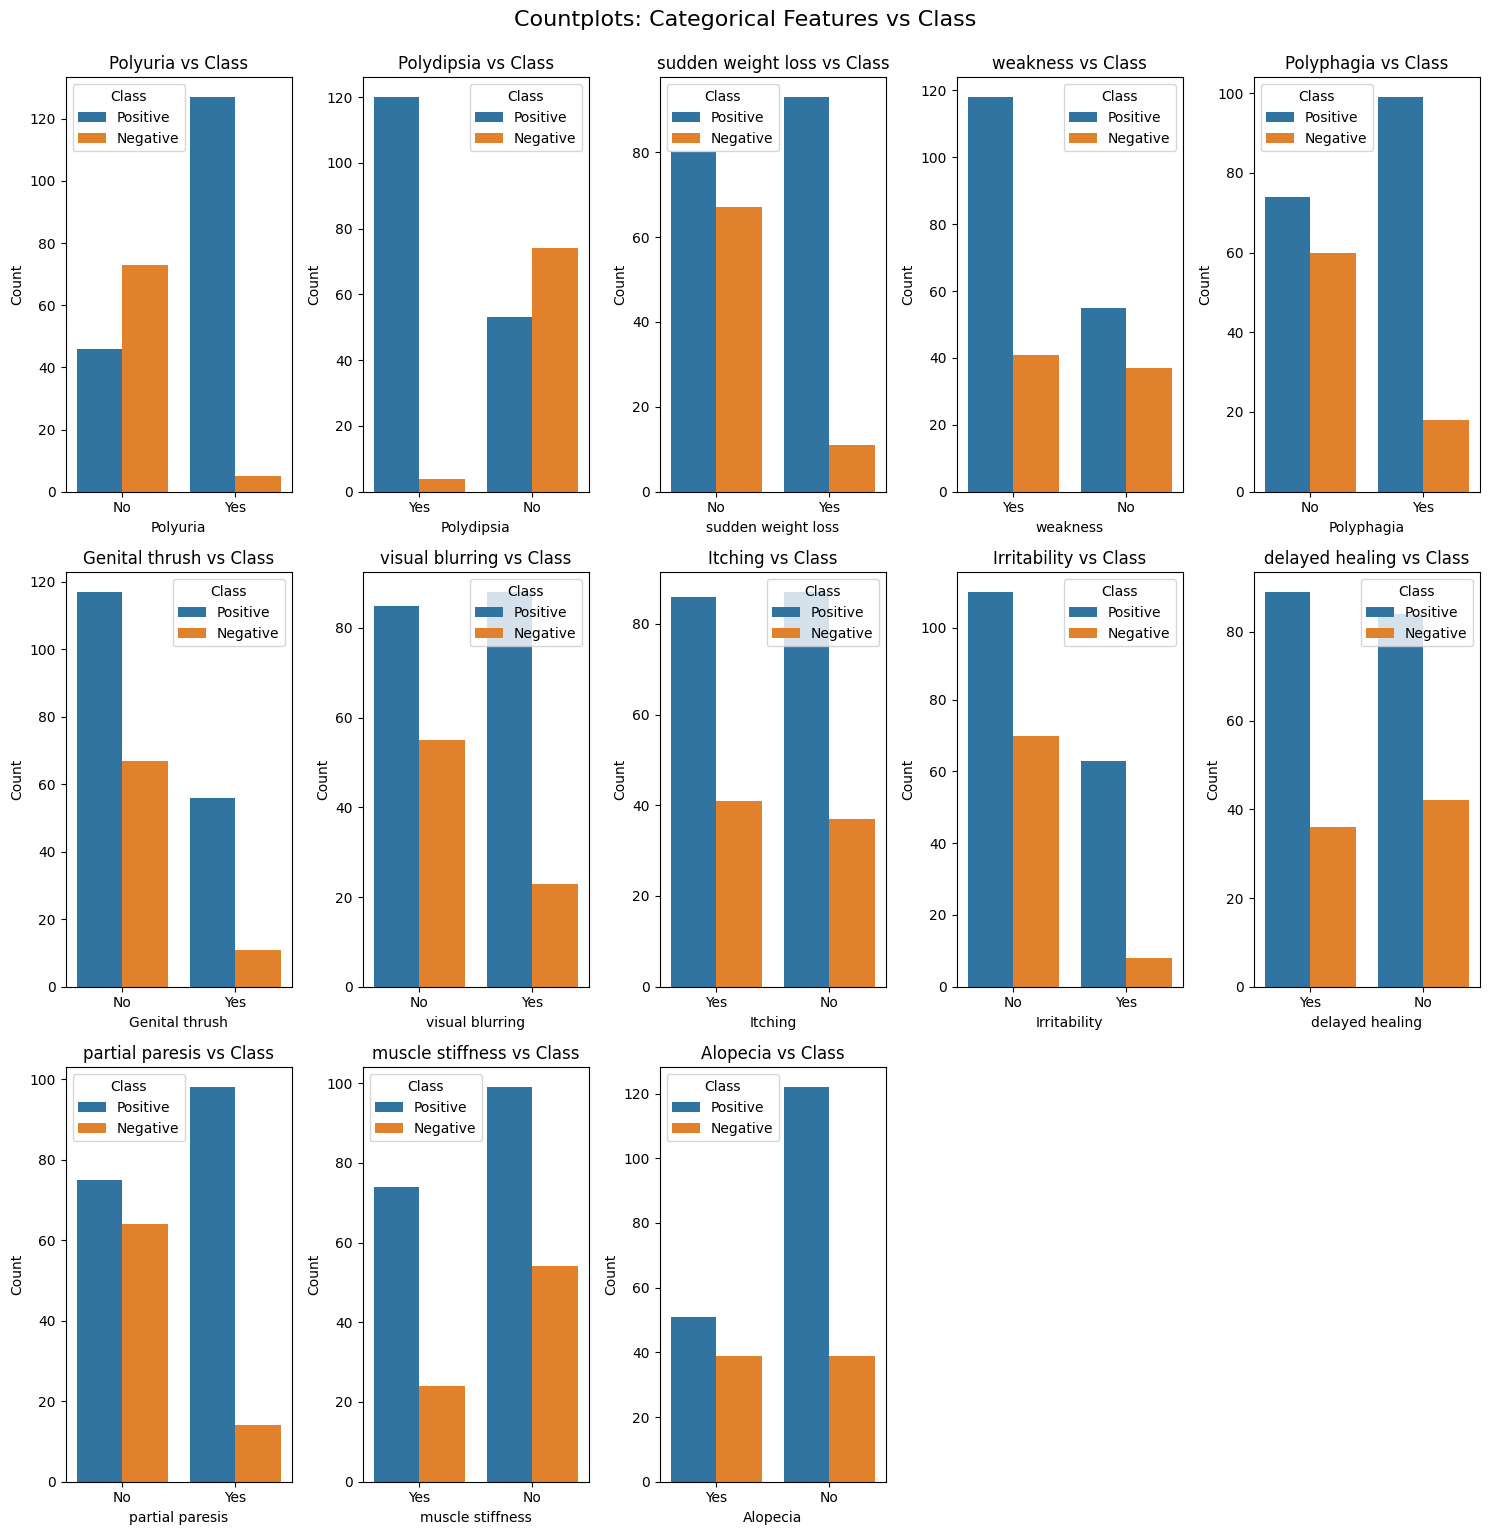

In [14]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("diabetes_data_cleaned.csv")

# Convert categorical 'Yes'/'No' columns to binary for analysis
df_binary = df.replace({'Yes': 1, 'No': 0})

# Function to plot multiple subplots in a 3-column layout
def plot_in_grid(columns, plot_function, title, rows=None, cols=5):
    # Calculate rows dynamically if not provided
    if not rows:
        rows = -(-len(columns) // cols)  # Equivalent to math.ceil

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()  # Flatten the 2D axes array for easy indexing

    # Loop through each column and plot
    for idx, column in enumerate(columns):
        plot_function(column, axes[idx])  # Call the specific plotting function

    # Turn off unused subplots
    for idx in range(len(columns), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.show()

# Numeric Features vs Class (Boxplots)
numeric_columns = ['Age']
def plot_numeric_vs_class(column, ax):
    sns.boxplot(x='class', y=column, data=df_binary, ax=ax)
    ax.set_title(f"{column} vs Class")
    ax.set_xlabel("Class")
    ax.set_ylabel(column)

plot_in_grid(numeric_columns, plot_numeric_vs_class, "Boxplots: Numeric Features vs Class", rows=1)

# Gender vs Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='class', data=df)
plt.title("Gender Distribution by Class")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Class", loc='upper right')
plt.show()

# Categorical Features vs Class (Countplots)
categorical_columns = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
                       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
                       'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia']

def plot_categorical_vs_class(column, ax):
    sns.countplot(x=column, hue='class', data=df, ax=ax)
    ax.set_title(f"{column} vs Class")
    ax.set_xlabel(column)
    ax.set_ylabel("Count")
    ax.legend(title="Class")

plot_in_grid(categorical_columns, plot_categorical_vs_class, "Countplots: Categorical Features vs Class")


**1. Age and Diabetes Class:**
> The boxplot of Age versus class reveals that individuals diagnosed with diabetes tend to be in the higher age group compared to those without diabetes.

> The age distribution for the "positive class" shows a significant number of individuals above 40 years, indicating that age could be a key predictor for diabetes risk.

**2. Gender and Diabetes Class:**
> The countplot for Gender versus class shows that diabetes occurs more frequently in males than in females.

> However, both genders are still well represented in the dataset, which suggests that gender, while important, may interact with other features for better prediction.

**3. Polyuria and Polydipsia are Strong Indicators:**
> The countplots for Polyuria and Polydipsia reveal that a significant proportion of individuals in the positive class (diabetes patients) report experiencing these symptoms.

> Specifically:
For Polyuria, most patients with diabetes reported "Yes."
Similarly, Polydipsia is highly correlated with diabetes presence.
This highlights that symptoms like excessive urination and thirst are prominent indicators of diabetes.

**4. Sudden Weight Loss and Weakness:**
> Features such as "sudden weight loss" and "weakness" also display noticeable differences between the classes.

> Individuals with diabetes (positive class) report higher incidences of these symptoms compared to the negative class.

> This suggests that such symptoms, when combined with other factors, can play a significant role in identifying diabetes risk.

**<h3> Correlation Between Variables </h3>**

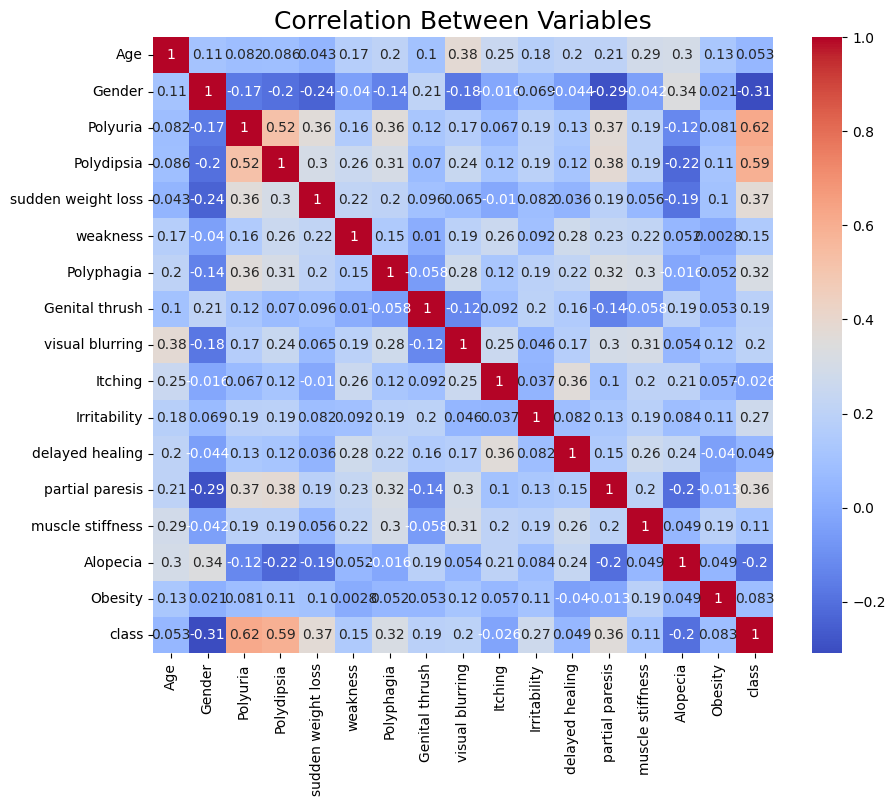

In [15]:
labelencoder = LabelEncoder()
# Replace 'diabetes_df' with 'df'
for i in df.columns[1:]: # Iterate over columns instead of row indices
    df[i] = labelencoder.fit_transform(df[i])

plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2g',cmap='coolwarm')
plt.title('Correlation Between Variables', fontsize=18);

> - **High Correlations with Diabetes Class:**
Polyuria (0.67), Polydipsia (0.65), and sudden weight loss (0.44) have a strong positive correlation with the diabetes class, indicating these symptoms are highly associated with diabetes in the dataset.
Partial paresis (0.43) and Polyphagia (0.34) also show moderate correlations with the diabetes class.

> - **Inter-relationships Between Symptoms:**
Polyuria and Polydipsia show a strong correlation (0.60), suggesting these symptoms frequently occur together.
Visual blurring is moderately correlated with muscle stiffness (0.41) and partial paresis (0.36), indicating a possible association between these symptoms.

> - **Negative Correlations:**
Alopecia has a notable negative correlation with Polydipsia (-0.31) and the diabetes class (-0.27), suggesting that its presence might be less common among individuals with diabetes in this dataset.

**<h3> Duplicating the Dataset </h3>**

In [16]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder()
dfcpy = df.copy()   # Duplicating the Dataset
dfcpy.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


**<h3> Dependent and Independent Variables </h3>**

In [17]:
x = dfcpy.drop(['class'],axis=1) # Independent
y= dfcpy['class'] # Dependent
x.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [18]:
y.head()

,class
0,1
1,1
2,1
3,1
4,1
